# PRÀCTICA 3: MACHINE LEARNING
>Autors: Khaoula Ikkene, Adrián Ruiz Vidal

>En aquesta pràctica se'ns demana entrenar diversos models d'aprenentatge vists a classe per a predir amb gran precisió el **tipus de coberta forestal** d'una mostra donada.
>El conjunt de dades de partida és el  *[Forest Cover Type Dataset](https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset/data)* , que conté 581013 mostres, cadascuna descrita per 54 atributs. Aquests atributs es detallaran més endavant. L'objectiu principal és poder classificar les mostres en set categories diferents.
>Els models a entrenar són els següents: el Perceptró, la Regressió Logística, les Màquines de Vectors de Suport (SVM), els Arbres de Decisió i els Boscs Aleatoris (Random Forest), tots ells disponibles a la llibreria *[Scikit-learn](https://scikit-learn.org/stable/)*.

# 1. Anàlisi exploratòria de dades


En aquesta secció durem a terme un anàlisi del nostre conjunt de dades, explicarem en detall què
representa cada paràmetre, i visualitzarem la distribució que té.

Primer de tot, importarem la llibreria pandas per a poder llegir el nostre conjunt de dades.

In [1]:
import pandas as pd

df = pd.read_csv("covtype.csv")

In [2]:
df.head(20)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


>Concretament els atributs que tenim són els següents:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Es poden identificar els següents paràmetres clau: l’elevació, l’aspecte, les distàncies horitzontals i verticals respecte a la hidrologia, la distància horitzontal a les carreteres, la distància als punts de foc, les ombres de muntanya a les 9 a.m., a les 3 p.m. i al migdia, així com quatre àrees salvatges (wilderness_area1, ..., wilderness_area4) on pot estar present la coberta forestal, 40 tipus de sòls diferents i el tipus de coberta (Cover_Type).

Des d’una altra perspectiva, aquests paràmetres es poden classificar en dues categories: els *multivalors*, que representen valors numèrics concrets associats a característiques específiques de la coberta forestal (com l’elevació, l’aspecte, les distàncies, les ombres, etc.), i els *binaris* o *categoriques*, que indiquen la presència (1) o l’absència (0) d’una característica en particular, com és el cas de les àrees salvatges i els tipus de sòl.

>Podem il·lustrar aquesta diferència de paràmetres en les següents taules:

In [4]:
multiValue_Columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

In [5]:
df[multiValue_Columns]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


In [6]:
binari_columns= df.columns.difference(multiValue_Columns)
binari_columns= binari_columns.drop('Cover_Type')
df[binari_columns]

,Soil_Type1,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,...,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
581008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
581009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
581010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Ara intentarem assegurar-nos que els rangs són raonables, és a dir, que els paràmetres binaris tinguin un rang de 2 (poden prendre el valor 0 o 1) i que el tipus de coberta (*Cover_Type*) presenti 7 valors diferents, corresponents a les categories finals en què classificarem el nostre conjunt de dades.

In [7]:
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

Verificarem que no tenim cap columna amb valors nuls.

In [8]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Per tant, observem que el nostre conjunt de dades és força net. No hi ha valors nuls ni valors que no pertanyin al rang de dades de les seves respectives columnes, i els tipus de les columnes són correctes. A més, hem comprovat que no hi ha columnes duplicades.

Ara, utilitzant el coeficient de Pearson, analitzarem si hi ha relacions entre alguna parella o parelles de variables.

>Primer visualitzarem les principals estadístiques descriptives del nostre conjunt de dades.

In [9]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Utilitzant el següent mètode, calcularem el coeficient de Pearson per a totes les parelles de columnes del nostre conjunt de dades. Concretament, només relacionarem les columnes amb valors continus, ja que les columnes de tipus sòl o les binàries (0 i 1) no proporcionen informació rellevant en aquest cas.

In [10]:
corr = df[multiValue_Columns].corr()

<Axes: >

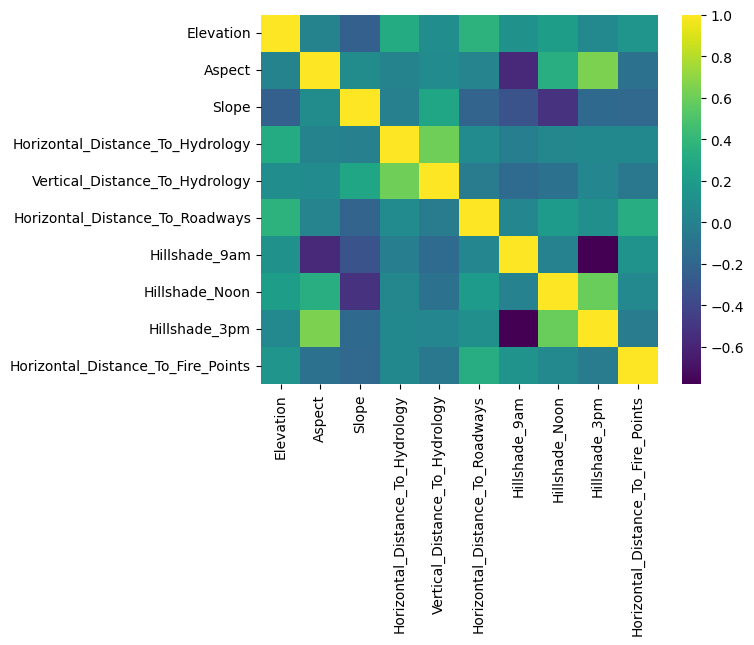

In [11]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='viridis')

>És una mica complicat interpretar la correlació entre les columnes directament, per això la representarem en forma de taula per a facilitar la seva comprensió. En aquesta ocasió, inclourem totes les columnes del nostre conjunt de dades.

In [12]:
corr.style.background_gradient(cmap='coolwarm')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


Ara podem llegir millor els valors de correlació de la taula. Per exemple, trobem que l'aspecte té una correlació positiva amb la columna HillShade_3pm, la distància vertical a la hidrologia està correlacionada de manera positiva amb la distància horitzontal, i la sombra al migdia té una correlació positiva amb la sombra a les 3pm. També hi ha una correlació positiva entre Soil_Type29 i Wilderness_Area1.

Tanmateix, no observam una correlació forta entre cap parella de variables que ens permeti eliminar alguna d'elles per reduir la dimensionalitat del nostre conjunt de dades.

>Dibuixarem els histogrames per a visualitzar els valors de les mostres, seguint amb el cas de columnes de valor continu:

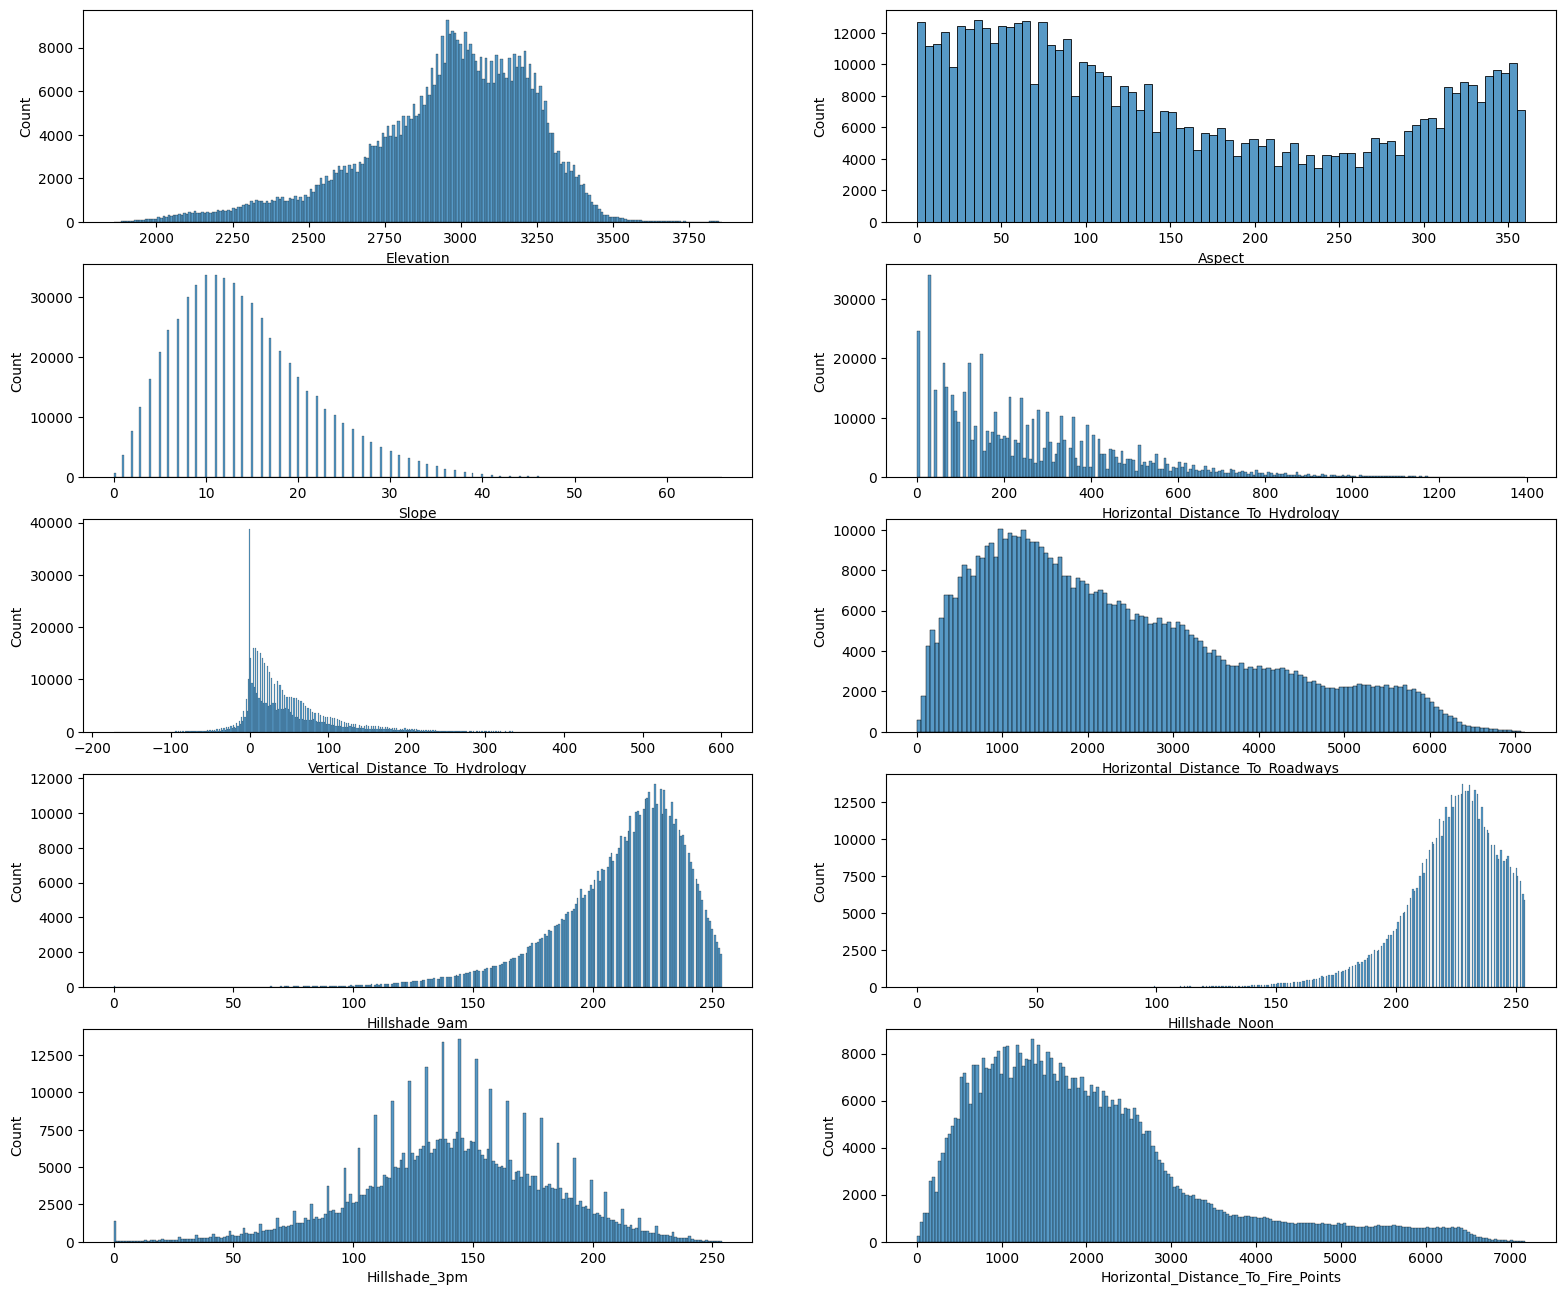

In [13]:
# Histogrames
import matplotlib.pyplot as plt

_, axes = plt.subplots(5, 2, figsize=(19, 16))

for ax, col in zip(axes.flatten(), multiValue_Columns):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_xlabel(col)

plt.show()

>Observem que els rangs de les columnes presenten diferències significatives. Per aquest motiu, serà necessari dur a terme un procés de normalització de dades. A més, explorarem diverses tècniques per a reduir la dimensionalitat del nostre conjunt de dades en la següent secció.

## 1.1 Tècniques de reducció de dimensions

En aquesta secció, com s’ha mencionat prèviament, explorarem i aplicarem diverses tècniques de reducció de dimensionalitat al nostre conjunt de dades. Aquestes tècniques són fonamentals quan treballam amb dades d’alta dimensionalitat, ja que permeten simplificar el conjunt de dades sense perdre informació rellevant.
A continuació, analitzarem les dues tècniques que implementarem: l’Anàlisi de Components Principals (PCA), i l'Anàlisi Discriminant Lineal(LDA).

Abans d'entrar en detall en cada tècnica, cal tenir en compte una nota molt important: moltes d'aquestes tècniques (exceptuant la LDA) es basen, principalment, en càlculs de distàncies o en l'anàlisi de la variància de les dades. Per aquest motiu, és important que les dades estiguin escalades prèviament per a garantir resultats més precisos i eficients.
Per això, normalitzarem primer les nostres dades usant el MinMaxScaler(), i fixant el rang [-1,1].

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

# Només escalarem les columnes de valor continu
# Crearem una còpia del dataset perquè no tots els models necessiten un escalament de dades
df2 = df.copy()
X_escalat = df2.drop(columns=['Cover_Type'])  
y_escalat = df2['Cover_Type'] 


X_escalat[multiValue_Columns] = scaler.fit_transform(df2[multiValue_Columns])
print(X_escalat)



        Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0       -0.262631 -0.716667 -0.909091                         -0.630637   
1       -0.268634 -0.688889 -0.939394                         -0.696492   
2       -0.054527 -0.227778 -0.727273                         -0.616321   
3       -0.073537 -0.138889 -0.454545                         -0.653543   
4       -0.263632 -0.750000 -0.939394                         -0.780959   
...           ...       ...       ...                               ...   
581007  -0.462731 -0.150000 -0.393939                         -0.878311   
581008  -0.467734 -0.155556 -0.424242                         -0.904080   
581009  -0.472736 -0.116667 -0.484848                         -0.914102   
581010  -0.474737 -0.055556 -0.545455                         -0.914102   
581011  -0.475738 -0.083333 -0.606061                         -0.914102   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       

## 1.2 PCA

El PCA és una tècnica de reducció de dimensions que crea noves variables, anomenades components principals, combinant linealment les variables originals. Aquests components són no correlacionats i concentren la màxima informació possible. Tot i que el nombre de components pot coincidir amb les dimensions originals, el PCA prioritza la informació: el primer component concentra la major part de la informació, el segon la informació restant més rellevant, i així successivament, permetent reduir dimensions mentre es manté l'essència de les dades.

Ara reduirem les dimensions del nostre conjunt de dades utilitzant la tècnica de PCA. A la llibreria `sklearn` ja tenim implementada aquesta tècnica amb `PCA(n_components=x)`, on `x` és el nombre de dimensions que volem conservar. Per tant, cal primer discutir el valor que seleccionarem per a `x` abans d'aplicar el PCA.

No existeix una tècnica que garanteixi al 100% com triar o triar bé aquest valor, però es pot aplicar la següent heurística: traçar la variància i triar el valor que capta almenys el 95% de la variància. Gràficament, mostrarem la variància i triarem el valor que compleix aquest requisit.

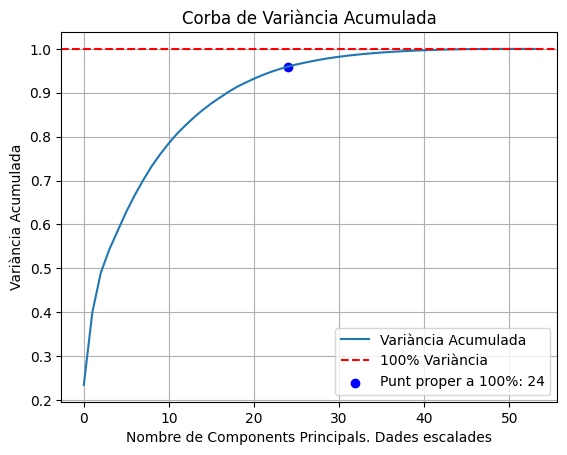

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

# Determinar el n_components ideal

# Dividim el nostre dataset en dades d'entrenament i altres de test
X_train, X_test, y_train, y_test = train_test_split(X_escalat, y_escalat, test_size=0.3, random_state=42)

pca = PCA()
pca.fit(X_train)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(varianza_acumulada >= 0.95)+1 


# Dibuixam la corba
plt.plot(varianza_acumulada, label="Variància Acumulada")
plt.axhline(y=1, color='r', linestyle='--', label="100% Variància")
plt.scatter(n_components, varianza_acumulada[n_components], 
            color='blue', label=f'Punt proper a 100%: {n_components}')

# Etiquetes i llegenda
plt.xlabel('Nombre de Components Principals. Dades escalades')
plt.ylabel('Variància Acumulada')
plt.title('Corba de Variància Acumulada')
plt.legend()
plt.grid()
plt.show()


>Per tant, obtenim que el nombre de components a usar és `24`.

## 1.3 Anàlisi Discriminant Lineal(LDA)

LDA és una tècnica de reducció de dimensions que, a diferència del PCA, no només busca reduir la dimensionalitat, sinó també maximitzar la separació entre les classes d'un conjunt de dades. La tècnica es basa en crear noves variables, anomenades components discriminants, combinant les variables originals de manera que les classes es distingeixin millor entre elles, maximitzant la variància entre les classes i minimitzant la variància dins de cada classe.

Per a la tècnica LDA, no hi ha una metodologia estàndard per a determinar el millor valor de n_components. L'únic que sabem és que 
$$
1 \leq n_{\text{components}} \leq c - 1, \ \text{on} \ c \ \text{és el nombre de classes del conjunt de dades}
$$

Per a determinar el millor valor per aquest paràmetre, farem servir un GridSearchCV.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
max_components = np.unique(y_train).size 
lda = LDA()

# Definir els paràmetres a explorar
param_grid = {'n_components': list(range(1, max_components))} 

grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Imprimir el millor nombre de components i la precisió associada
print(f"El millor nombre de components és: {grid_search.best_params_['n_components']}")
print(f"La millor exactitud és: {grid_search.best_score_:.4f}")


El millor nombre de components és: 1
La millor exactitud és: 0.6805


>El GridSearchCV aplicat conclou que el valor ideal per a **n_components** és **1** en el cas de LDA, amb una exactitud del 68.05%.

Ara que sabem quin és el valor adequat de *n_components* per a cada tècnica, podríem aplicar-les. No obstant això, no tenim una mètrica conjunta que ens permeti comparar directament ambdues tècniques. Tanmateix, coneixem els usos específics de cadascuna. PCA, concretament, proporciona nous eixos (components principals) que representen direccions de màxima variància sense tenir en compte la informació de classe. En canvi, LDA redueix les dimensions mentre millora la separabilitat entre classes, fet que la fa més eficaç quan l'objectiu és la classificació. Per tant, LDA millora la classificació final aprofitant les etiquetes de classe per a trobar combinacions de funcions òptimes. Aquesta diferenciació ens permet concloure que la millor tècnica per utilitzar en el nostre cas és LDA.

Així i tot, provarem les dues tècniques per a comparar el rendiment i l'exactitud.

>A continuació discutirem els models que requereixen una normalització de dades abans de l'entrenament:

Model| Normalització necessaria
|---------|--------------------|
|Perceptró|Sí. El Perceptró utilitza productes escalars per a calcular els límits de decisió. Si les característiques estàn a diferents escales, les característiques amb valors més grans dominaran el procés d'aprenentatge, cosa que pot portar a resultats ineficients.|
|Regressió Logística|Depèn. La regressió logística no requereix explícitament de la normalització de dades.|
|Màquines de Vectors de Suport(SVM)|Sí. SVM calcula distàncies entre punts i marges en un espai de característiques. Si les característiques no estàn a la mateixa escala, les que tenen valors majors dominaran i afectaran la qualitat de l'hiperplà de separació.|
|Arbres de decisió|No. Els arbres de decisió són invariants a l'escala perquè divideixen les dades en funció de llindars relatius i no de distàncies absolutes. Per tant, la normalització no afecta al rendiment.|
|Boscs Aleatoris|No. Per les mateixes raons que els arbres de decisió.|

>En quant als models als quals aplicarem alguna tècnica de reducció, el model SVM es pot beneficiar d'aquesta reducció de dimensions. La resta de models, com el perceptró, la regressió logística, els arbres de decisió i el random forest, no necessiten aquesta reducció, tot i que també podrien veure qualcun benefici en termes d'eficiència o sobreajust.

# 2. Perceptró

L'objectiu és trobar el tipus de coberta, doncs 'Cover_Type' és la principal característica que ens interessa ja que és la que ens demanen. Ho farem amb les característiques normalitzades.

Hem de dividir el conjunt de dades en entrenament i prova. Utilitzarem un percentatge de test d'un 30% per a tots els models.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_escalat, y_escalat, test_size=0.3, random_state=42)

## 2.1 Hiperparàmetres

>Aquests són els hiperparàmetres del perceptró:

Paràmetre| Descripció
|---------|--------------------|
|penalty|{'l2', 'l1', 'elasticnet', 'None'}, default= 'None'. Ús d'una regularització durant el procés d'entrenament. S'utilitza per evitar el sobreajustament ajustant els pesos del model mitjançant una penalització.|
|alpha|int, default=1e-3. Controla la intensitat de la regularització.|
|fit_intercept|boolean, default=’True’. Si el model ha de passar obligatoriament per l'origen de les coordenades. True determina que no ha de passar necesariament per allà.|
|tol|float, default=1e-3. Defineix la tolerància que l'algorisme utilitza com a criteri de convergència per aturar el procés d'optimització.|
|verbose|bool, default=False. Habilita la sortida detallada durant l'entrenament del model, proporcionant informació addicional sobre el progrés i els passos de l'algorisme.|
|max_iter| int, default=-1. Controla el nombre màxim d'iteracions que l'algorisme pot fer durant el procés d'optimització, és a dir, durant l'ajustament del model a les dades d'entrenament. -1 és sense límit, és a dir, l'algorisme continua iterant fins que convergi.|
|random_state|int, RandomState instance or None, default=None. Controla la generació de números pseudoaleatoris per barrejar les dades per estimacions de probabilitat.|
|shuffle|float, default=1. Indica si s'han de barrejar les dades abans de cada iteració.|
|eta0|bool, default=True. És el tamany inicial del pas en l'algoritme d'aprenentatge del perceptró.|

Anem a veure els paràmetres que estàn en ús del model base del perceptró.

In [18]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=42, n_jobs=-1)

print(f"Paràmetres del model base: ")
print(perceptron.get_params())

Paràmetres del model base: 
{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': None, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


Anem a cercar els millors hiperparàmetres per al perceptró, per això escollirem els principals i ampliarem el repertori de paràmetres perque cerqui els millors. Farem ús de GridSearch, que és una eina per a cercar hiperparàmetres, marcant com a objectiu *accuracy*, ja que és l'estadística més important. El paràmetre de GridSearch *n_jobs* també es important incluir-ho per aprofitar el màxim rendiment de l'ordinador. Aquesta eina ens servirà per a tots els models.

In [19]:
param_perc = {
    'penalty': ['l2','elasticnet', None], 
}

grid_search = GridSearchCV(
    Perceptron(random_state=42),
    param_grid=param_perc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Perceptron(random_state=42), n_jobs=-1,
             param_grid={'penalty': ['l2', 'elasticnet', None]},
             scoring='accuracy')

Després de fer moltes proves hem trobat que amb cap dels paràmetres obteníem bons resultats d'exactitud i de fet, obteníem pitjors resultats que sense cap paràmetre. Es poden veure els millors hiperparàmetres resultants, que en aquest cas ha sigut el paràmetre que venia establert per defecte, és a dir, *penalty* = None.

## 2.2 Mesures d'avaluació

Una vegada obtingut el model, s'han d'obtenir les mesures d'avaluació que millor convenen al perceptró i sobretot a aquests resultats.

En primer lloc, mesurarem l'exactitud utilitzant la mètrica *accuracy_score* de sklearn, que calcula la proporció de **prediccions correctes** sobre el total de prediccions realitzades. Aquesta serà una primera mesura que ens proporcionarà una idea clara sobre l'eficàcia dels hiperparàmetres trobats, especialment si han tingut un impacte positiu en el rendiment del model.

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_perc = grid_search.best_estimator_

# Predir el model amb els hiperparàmetres trobats amb GridSearch
y_pred_gs = best_perc.predict(X_test)

accuracy_gs = accuracy_score(y_test, y_pred_gs)
print(f"Exactitud del perceptró hiperparametritzat amb GridSearch: {accuracy_gs:.4f}")


Exactitud del perceptró hiperparametritzat amb GridSearch: 0.6737


>Ens dóna una exactitud del `67.37%` amb els millors hiperparàmetres cercats. Anem a comparar amb el model base que ve per defecte per assegurar-nos de que obtenim els mateixos resultats com hem comentat abans.

In [21]:
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

y_pred_base = perceptron.predict(X_test)

accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Exactitud del model base del perceptró: {accuracy_base:.4f}")

Exactitud del model base del perceptró: 0.6737


>I com podem comprovar, el **model base** ens dóna un **rendiment igual** en quant a exactitud (que és una estadística molt potent per a comparar models, ja que determina el percentatge de prediccions correctes), concretament ens dóna `67.37%`. Com ja hem comentat abans a la cerca, el millor hiperparàmetre ha resultat ser el predeterminat, per tant, s'ha obtingut el mateix resultat. Això vol dir que els paràmetres establerts per defecte són realment bons i fiables per a tenir presents com a primera medida de rendiment.

El perceptró realitza una divisió lineal que divideix l'espai en dues característiques. En aquest cas hi ha set característiques del tipus de coberta (l'objectiu), el perceptró necessita utilitzar l'estrategia 'one VS rest' per a dividir l'espai en más multiclasses. Ja que hem obtingut una exactitud baixa, anem a utilizar la matriu de confusió per a veure a què es pot deure aquesta desviació.

La matriu de confusió té els valors correctes a la matriu **diagonal**. És a dir, al valor i=1 j=1 hi ha els valors que han sigut predits com a classificació 1 i han sigut realment classificació 1, és a dir, que són correctes. Al valor i=1 j=2 hi ha els valors que han sigut predits com a classificació 2 i eren realment classificació 1. Així amb tots, així que quan més grossos siguin els valors diagonals i més petits siguin la resta de valors, més bó serà el model.

>Anem a mesurar les estadístiques del model base, que en es final, ha resultat ser el millor. Començarem mesurant la matriu de confusió:

In [22]:
conf_base = confusion_matrix(y_test, y_pred_base)
print("Matriu de Confusió del model base:")
print(conf_base)

Matriu de Confusió del model base:
[[41907 19069   293     0    27     4  2256]
 [18777 60980  4927     7    10    33   344]
 [    0   481 10024    50     0    83     0]
 [    0     0   620   139     0    36     0]
 [   81  2475   365     0    14     6     0]
 [    3   978  4013    40     0   193     0]
 [ 1813    60    23     0     0     0  4173]]


Com podem veure, la primera classe, la segona, la tercera i la darrera tenen un gran percentatge de valors correctes. En canvi, a la resta de classes els resultats es veuen clarament desfavorables, ja que prediuen incorrectament els valors de les categories 4,5 i 6.

>Anem a representar-lo en format mapa de calor:

<Axes: >

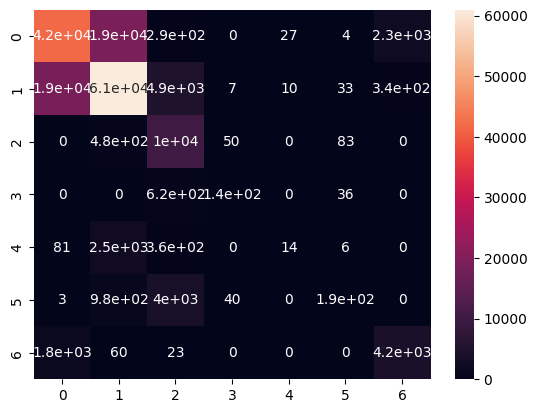

In [23]:
sns.heatmap(conf_base, annot=True)

Així es veu de manera més clara, representant amb els tons més clars les prediccions destacades de les altres.

Ara mostrarem per primera vegada l'informe de classificació, que mostra un gran resum dels resultats del model. La `precisió` mostra el percentatge de prediccions positives de cada classificació, el `recall` indica tots els casos positius reals, `f1-score` és una mitjana entre la precisió i el recall, balanceja ambes mètriques. `Support` és el nombre de mostres que hi ha de cada classe. `Accuracy` (exactitud) calcula la proporció de prediccions correctes sobre el total de prediccions. `Macro average` indica la mitja aritmètica de les mètriques de cada classe, sense tenir en compte el nombre d'instàncies a cada classe. `Weighted average` calcula la mitja ponderada de les mètriques de cada classe, tenint en compte el tamany de cada classe.

In [24]:
class_report_base = classification_report(y_test, y_pred_base)
print("Informe de classificació del model base:")
print(class_report_base)

Informe de classificació del model base:
              precision    recall  f1-score   support

           1       0.67      0.66      0.66     63556
           2       0.73      0.72      0.72     85078
           3       0.49      0.94      0.65     10638
           4       0.59      0.17      0.27       795
           5       0.27      0.00      0.01      2941
           6       0.54      0.04      0.07      5227
           7       0.62      0.69      0.65      6069

    accuracy                           0.67    174304
   macro avg       0.56      0.46      0.43    174304
weighted avg       0.67      0.67      0.66    174304



Podem veure que els primers 3 nivells tenen unes notables estadístiques com el darrer nivell, exceptuant la precisió del tercer que no és gaire bona però ho compensa amb un bon recall. Els altres 3 nivells tenen una dolenta qualificació. També hem de dir que aquests 3 nivells (4,5 i 6) són els que menys proves tenen i, per tant, menys dades per a classificar correctament.

>Per tant, podem concluir en que els hiperparàmetres no sempre són eficaços, i pot donar lloc a models com aquest, on el model base ha donat el millor resultat, és a dir, amb els paràmetres establerts d'inici. I això que hem fet diverses proves amb més hiperparàmetres, però cap d'elles ha resultat eficient.

# 3. Regressió Logística

Ara passarem al model de regressió logística, per fer-ho, emplearem la divisió en entrenament i test, tal com hem fet al perceptró i no la inclourem perquè ja la havíem fet abans amb les dades normalitzades.

## 3.1 Hiperparàmetres

>Anem a incluir els hiperparàmetres de la regressió logística que no formin part del perceptró:

Paràmetre| Descripció
|---------|--------------------|
|dual|bool, default=False. Especifica si el problema s'ha de resoldre en forma dual o en forma primal.|
|intercept_scaling|float, default=1. Només s'aplica si fit_intercept=True i solver = ‘liblinear’. Escala el terme d'intersecció.|
|solver|{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’. Especifica l'algoritme d'optimització utilitzat per a trobar els coeficients del model.|
|multi-class|{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’. Defineix com s'ha de manejar la classificació multiclasse.|
|warm-start|bool, default=False. Si és True, reutilitza els arbres del model anterior i els afegeix nous arbres en lloc d'entrenar un nou model des de zero.|

Aqui podem veure els paràmetres que té per defecte la regressió logística:

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


>Amb aquests paràmetres que veim per defecte hem de cercar els més importants, així que en base a aquests escollirem diferents opcions. Anem a utilitzar l'eina de `GridSearchCV`.

In [26]:
param_logregr = {
    'solver': ['lbfgs', 'liblinear','saga']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=500),
    param_grid=param_logregr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             n_jobs=-1, param_grid={'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

>Hem hagut de modificar el paràmetre de *max_iter* a un nombre d'iteracions més alt (estava fixat anteriorment a 100), perquè quan hem fet l'entrenament per primera vegada, ens ha dit que el model encara no havia convergit.

Hem dividit la cerca dels hiperparàmetres en dues cerques perque tardi menys temps. Ara tenim l'hiperparàmetre de *solver* i l'introduim a la pròxima cerca dins el model de GridSearchCV.

In [27]:
param_logregr = {
    'penalty': ['l2', None]
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=500, solver='saga'),
    param_grid=param_logregr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, random_state=42,
                                          solver='saga'),
             n_jobs=-1, param_grid={'penalty': ['l2', None]},
             scoring='accuracy')

Aquests son els paràmetres finals del nostre model optimitzat de regressió logística.

## 3.2 Mesures d'avaluació

Ja tenim totes les característiques per a fer les prediccions. Ara analitzarem el resultat del model amb les mesures d'avaluació que més li convenen.

In [28]:
best_logregr = grid_search.best_estimator_

y_pred_gs = best_logregr.predict(X_test)

accuracy_gs = accuracy_score(y_test, y_pred_gs)
print(f"Exactitud del model optimizat: {accuracy_gs:.4f}")

Exactitud del model optimizat: 0.7234


>L'exactitud obtinguda és del `72,34%`. És a dir, aproximadament 72 de cada 100 vegades prediu correctament la categoria de tipus coberta forestal.

Ara mostrarem l'informe de classificació d'aquest model optimitzat:

In [29]:
class_report_logregr = classification_report(y_test, y_pred_gs)
print("Informe de classificació del model optimizat:")
print(class_report_logregr)

Informe de classificació del model optimizat:
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     63556
           2       0.75      0.80      0.77     85078
           3       0.68      0.80      0.73     10638
           4       0.61      0.43      0.51       795
           5       0.20      0.01      0.01      2941
           6       0.50      0.27      0.35      5227
           7       0.72      0.57      0.63      6069

    accuracy                           0.72    174304
   macro avg       0.59      0.51      0.53    174304
weighted avg       0.71      0.72      0.71    174304



Tal com passava amb el perceptró, els tres primers nivells i el darrer són els que més bones estadístiques tenen. En termes generals, no hi ha grans diferències amb el perceptró però és vera que aquí es veuen resultats un poc més bons.

Mostrarem també la matriu de confusió, però ara amb el format de mapa de calor directament:

<Axes: >

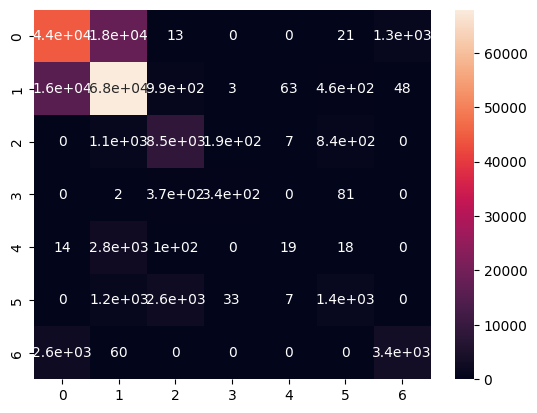

In [30]:
conf_gs = confusion_matrix(y_test, y_pred_gs)
sns.heatmap(conf_gs, annot=True)

La diferència amb el perceptró aqui és que aquest és molt més regular a totes les classifcacions. De fet, té valors més alts a les diagonals, és a dir, prediccions correctes a cada classificació a tots els nivells exceptuant el tercer.

>Ara farem una breu comparació amb el model base, que utilitza els paràmetres establerts per defecte. 

In [31]:
base_logregr = LogisticRegression(random_state=42, max_iter=500)
base_logregr.fit(X_train, y_train)

y_pred_base = base_logregr.predict(X_test)

accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Exactitud del model base: {accuracy_base:.4f}")

Exactitud del model base: 0.7229


L'exactitud del model base ha resultat ser del `72.29%`. Com podem veure ha sortit una mica més baixa que la regressió logística amb els hiperparàmetres trobats. Hem hagut d'incrementar el paràmetre de *max_iter* com en el model optimitzat perque no convergia del tot i sortia un warning.

In [32]:
class_report_base = classification_report(y_test, y_pred_base)
print("Informe de classificació del model base:")
print(class_report_base)

Informe de classificació del model base:
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     63556
           2       0.75      0.80      0.77     85078
           3       0.67      0.81      0.73     10638
           4       0.56      0.39      0.46       795
           5       0.20      0.01      0.01      2941
           6       0.50      0.23      0.32      5227
           7       0.72      0.56      0.63      6069

    accuracy                           0.72    174304
   macro avg       0.59      0.50      0.52    174304
weighted avg       0.71      0.72      0.71    174304



Amb aquests valors de l'informe de classificació podem notar més la diferència, ja que aquests resultats del model base són en general més baixos que el model optimitzat que hem mostrat abans, sobretot fixant-nos a la quarta i sisena classe on el f1-score, que té en compte tant la precisió com el recall, es clarament més baix. A la resta, no hi ha grans diferències.

Mostrarem també la matriu de confusió del model base:

<Axes: >

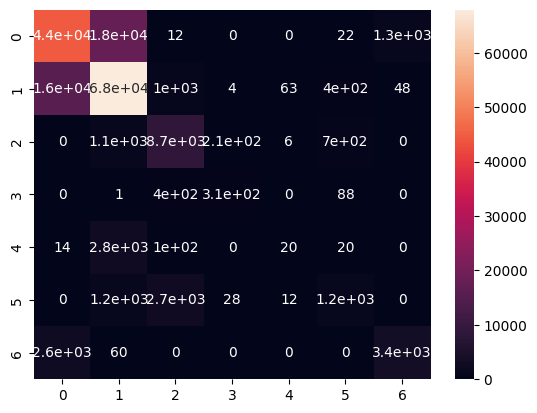

In [33]:
conf_matrix_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(conf_matrix_base, annot=True)

Aqui notam poques diferències respecte els colors, ja que canvien els valors, però no en gran quantitat, fent que es vegin els mateixos colors.

>Aquí sí que s'ha obtingut un millor resultat amb els hiperparàmetres que amb el model base. No hi ha gaire diferència però tota diferència positiva sempre és bona.

# 4. Màquines de Vectors de Suport(SVM)

En aquesta secció, analitzarem amb detall tots els hiperparàmetres del model SVM per a comprendre millor la seva elecció i la selecció dels valors més adequats.

## 4.1 Hiperparàmetres

>Aquest model, té els següents hiperparàmetres:

Paràmetre| Descripció
|---------|--------------------|
|C|float, default=1.0. Paràmetre de regularització. Controla l'equilibri entre la complexitat del model i l'ajust de les dades de l'entrenament. Un valor gran de C penalitza més errors, redueix el marge i pot introduir underfitting. Per altra banda, un valor petit de C permet més errors, i resulta en un marge més ample.|
|kernel|{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’. Especifica el tipus de kernel que s'utilitzarà a l'algorisme. S'usa per a calcular prèviament la matriu del nucli a partir de dades.|
|degree|int, default=3. És el grau de la funció del nucli polimonial.|
|gamma|{‘scale’, ‘auto’} or float, default=’scale’. Coeficient del nucli que controla l'abast d'influència d'un únic punt d'entrenament sobre altres en el càlcul del kernel. Concretament, regula com es mesura la similitud entre dos punts en l'espai d'entrada.|
|coef|float, default=0.0. Terme independent que afecta a la forma dels kernels poly i sigmoid.|
|shrinking|bool, default=True. Usar o no la heurística de reducció. Es tracta d'accelerar l'entrenament del model reduint el número de punts de suport considerats en cada iteració de l'algorisme.|
|probability|especifica si el model ha de calcular estimacions de probabilitat per a les prediccions.|
|tol|float, default=1e-3. Defineix la tolerància que l'algorisme utilitza com a criteri de convergència per aturar el procés d'optimització.|
|cache_size|float, default=200. Tamany de la caché del kernel (en MB).|
|class_weight|dict or ‘balanced’, default=None. Permet manejar datasets desbalancejats ajustant la importància relativa de cada classe.|
|verbose|bool, default=False. Habilita la sortida detallada durant l'entrenament del model, proporcionant informació addicional sobre el progrés i els passos de l'algorisme.|
|max_iter| int, default=-1. Controla el nombre màxim d'iteracions que l'algorisme pot fer durant el procés d'optimització, és a dir, durant l'ajustament del model a les dades d'entrenament. -1 és sense límit, és a dir, l'algorisme continua iterant fins que convergi.|
|decision_function_shape|{‘ovo’, ‘ovr’}, default=’ovr’. Controla com s'estructura la sortida de la funció de decisió en classificació multiclasse.|
|break_ties|bool, default=False. Controla com es manegen els casos d'empats en la predicció de classes en un model multiclasse.|
|random_state|int, RandomState instance or None, default=None. Controla la generació de números pseudoaleatoris per barrejar les dades per estimacions de probabilitat.|

Usant el GridSearchCV intentarem trobar la millor combinació dels següents hiperparàmetres: **C**, **kernel**. El hiperparàmetre **shrinking** ja està a True i fixarem el **random_state** a 42 per obtenir sempre els mateixos resultats.

A nivell pràctic, el SVM pot ser considerablement lent quan es treballa amb conjunts de dades grans i amb un elevat nombre de dimensions (característiques), com és el cas del nostre. Per aquest motiu, hem optat per no utilitzar la totalitat del conjunt de dades ni en l'entrenament ni en el procés de grid search, ja que això implicaria temps d'execució molt prolongats, de diverses hores.

## 4.2 Mesures d'avaluació

>El següent codi determina els millors hiperparàmetres per al model svm. I aplica la tecnica PCA a priori, per accelerar la cerca del GridSearchCV.


In [34]:
from sklearn.svm import SVC as svm
import time

# Obtenim una mostra del conjunt de dades i la normalitzarem també

df_svm= df.sample(n=50000, random_state=42)
X_reduit = df_svm.drop(columns=['Cover_Type'])
y_reduit = df_svm['Cover_Type']
X_reduit[multiValue_Columns] = scaler.fit_transform(df_svm[multiValue_Columns])
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_reduit, y_reduit, test_size=0.3, random_state=42)

pca_start_time= time.time()
# Cream còpies, però no canviam el valor de les variables originals, perquè les emprarem més endavant
X_train_pca=X_train_svm.copy()
X_test_pca= X_test_svm.copy()
y_train_pca = y_train_svm.copy()
y_test_pca = y_test_svm.copy()

# Reducció de dimensions
pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_pca, y_train_pca)
X_test_pca = pca.transform(X_test_pca)
pca_end_time = time.time()
print(f"Temps de PCA: {pca_end_time - pca_start_time:.2f} segons")
model_start_time = time.time()
# Determinar els millors valors dels hiperparàmetres
param_grid = {
     'C': [0.1, 1, 10, 100], 
     'kernel': ['linear', 'rbf', 'poly'] 
}

model = svm()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train_pca, y_train_pca)

model_end_time = time.time()
print(f"Temps d'entrenament del model: {model_end_time - model_start_time:.2f} segons")

# Veure els millors paràmetres
print(f'Best parameters: {grid_search.best_params_}')

Temps de PCA: 0.03 segons
Temps d'entrenament del model: 516.47 segons
Best parameters: {'C': 100, 'kernel': 'rbf'}


>Ara que disposem dels millors hiperparàmetres, aplicarem les dues tècniques de reducció de dimensionalitat utilitzant els hiperparàmetres òptims obtinguts prèviament. A més, realitzarem una prova sense reducció de dimensionalitat per determinar quina opció és més adequada.

In [35]:

# Per guardar els resultats
resultats = []

def aplicar_model(tipus_tecnica, n_components=None):
    if tipus_tecnica == 'LDA':
        model_transformacio = LDA(n_components=n_components)
    elif tipus_tecnica == 'PCA':
        model_transformacio = PCA(n_components=n_components)
   
    else:  # Cap tècnica
        model_transformacio = None
    
    # Transformació
    if model_transformacio:
        X_train_transformed = model_transformacio.fit_transform(X_train_svm, y_train_svm)
        X_test_transformed = model_transformacio.transform(X_test_svm)
    else:
        X_train_transformed = X_train_svm
        X_test_transformed = X_test_svm

    # Entrenament del model
    model = svm(kernel='rbf', C=100)
    model_start_time = time.time()
    model.fit(X_train_transformed, y_train_svm)
    model_end_time = time.time()

    # Predicció
    prediction_start_time = time.time()
    y_pred_svm = model.predict(X_test_transformed)
    prediction_end_time = time.time()

    # Guardar els resultats
    accuracy = accuracy_score(y_test_svm, y_pred_svm)
    classificacion_report= classification_report(y_test_svm, y_pred_svm, zero_division=0)
    resultats.append({
        "Tècnica": tipus_tecnica,
        "Components": n_components if n_components else "-",
        "Temps entrenament (s)": round(model_end_time - model_start_time, 2),
        "Temps predicció (s)": round(prediction_end_time - prediction_start_time, 2),
        "Exactitud": round(accuracy, 4),
        "classificació": classificacion_report
    })

# Executar per a cada tècnica
aplicar_model('LDA', n_components=1)
aplicar_model('PCA', n_components=24)
aplicar_model('Cap')

# Mostrar resultats en format de taula
resultats_df = pd.DataFrame(resultats)
print(resultats_df.iloc[:, :-1]) # Imprimem totes la informació excepte l'informe de classificació

# L'exactitud i el classification report per al millor model trobat

millor_resultat = max(resultats, key=lambda x: x["Exactitud"])
classificacion = millor_resultat["classificació"]

print(f'Accuracy: {millor_resultat["Exactitud"]}')

print(classificacion)


  Tècnica Components  Temps entrenament (s)  Temps predicció (s)  Exactitud
0     LDA          1                  33.69                18.96     0.6971
1     PCA         24                  47.21                15.58     0.8267
2     Cap          -                  56.73                19.49     0.8133
Accuracy: 0.8267
              precision    recall  f1-score   support

           1       0.84      0.79      0.82      5471
           2       0.83      0.89      0.86      7306
           3       0.76      0.85      0.81       915
           4       0.87      0.65      0.74        74
           5       0.80      0.34      0.48       256
           6       0.70      0.54      0.61       465
           7       0.86      0.83      0.84       513

    accuracy                           0.83     15000
   macro avg       0.81      0.70      0.74     15000
weighted avg       0.83      0.83      0.82     15000



>La tècnica LDA no és adequada per aquest conjunt de dades, ja que presenta una exactitud inferior al model entrenat sense reducció de dimensionalitat. En canvi, la tècnica PCA ofereix una exactitud similar a la del model original, sense diferències significatives. Per tant, optarem per aquesta configuració del model SVM per a les comparacions amb la resta de models.

# 5. Arbres de Decisió

Aquest model no necessita de dades normalitzades (escalades), per tant, hem de fer la divisió entrenament i prova una altra vegada però ara sense dades escalades.

>Provarem el model base per a veure la seva exactitud:

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Cream una còpia del conjunt de dades original, ja que no hem de normalitzar les dades
df3 = df.copy()
X = df3.drop(columns=['Cover_Type'])  
y = df3['Cover_Type'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_base = dt.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Exactitud del model base: {accuracy_base:.4f}")

Exactitud del model base: 0.9341


S'ha obtingut una exactitud molt bona del `93.41%` sense hiperparàmetres. Encara així, intentarem cercar hiperparàmetres per a veure si ho podem millorar.

## 5.1 Hiperparàmetres

>Els hiperparàmetres dels models d'arbres de decisió són els següents:

Hiperparàmetre|Descripció
|---------|--------------------|
|splitter|{“best”, “random”}, default=”best”. Defineix l'estratègia a usar per a triar la divisió a cada node.|
|criterion | (str, default='gini'). Funció que mesura la qualitat d'una divisió. Els criteris admesos són "gini", "log_loss" i "entropy".|
|max_depth |(int o None, default=None). Profunditat màxima de cada arbre. Si s'estableix a None, els arbres creixen completament, fins que tots els nodes siguin fulles pures o fins que es compleixin altres condicions.|
|min_samples_split|(int o float, default=2). Defineix el nombre mínim de mostres que han d'existir en un node perquè aquest es divideixi.|
|min_samples_leaf | (int o float, default=1). Especifica el nombre mínim de mostres que ha de contenir un full perquè l'arbre pugui continuar dividint.|
|min_weight_fraction_leaf |(float, default=0.0). Defineix la fracció mínima dels pesos de les mostres que ha de tenir un full per ser considerada a la divisió. És útil si tens mostres amb pesos desiguals.|
|max_features |(int, float, str o None, default='sqrt'). Controla quantes característiques (o variables) s'han de considerar en dividir un node.|
|max_leaf_nodes |(int o None, default=None). Estableix el número màxim de nodes fulla permesos en cada arbre.|
|min_impurity_decrease |(float, default=0.0). El valor mínim de reducció de la impuresa requerit per a dividir un node. Si la reducció en la impuresa és menor que aquest valor, no es fa la divisió.|
|random_state | (int, RandomState o None, default=None). Estableix la llavor per al generador de números aleatoris. Això assegura que els resultats siguin reproduïbles.|
|class_weight |(dict, list, str o None, default=None). Permet assignar pesos a les classes. Això és útil quan les classes estan desbalancejades (per exemple, algunes classes tenen moltes més mostres que altres). Es pot establir a "balanced" o "dict".|
|ccp_alpha |(float, default=0.0). Paràmetre de poda costosa per a reduir la mida de l'arbre.|
|monotonic_cst |(list of int, default=None). En problemes de regressió, es pot utilitzar aquest paràmetre per imposar restriccions monotòniques a les característiques.|


Cercarem els millors hiperparàmetres amb aquests valors que veim per defecte (default) i valors propers a aquests dels paràmetres més importants de l'arbre de decisió.

>Per fer-ho, farem feina amb `GridSearchCV` cercant el millor paràmetre de *criterion*:

In [37]:
param_dec_tree = {
    'criterion': ['gini', 'entropy', "log_loss"]
}

dec_tree = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(
    dec_tree,               
    param_grid=param_dec_tree,  
    cv=5,  
    scoring='accuracy', 
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

>Anem a mostrar l'exactitud del nostre model hiperparametritzat:

In [38]:
y_pred_gs = grid_search.best_estimator_.predict(X_test)

accuracy_gs = accuracy_score(y_test, y_pred_gs)
print(f"Exactitud del model hiperparametritzat: {accuracy_gs:.4f}")

Exactitud del model hiperparametritzat: 0.9400


Hem obtingut una exactitud del `94%`. Amb GridSearch hem obtingut millors hiperparàmetres que el model base. És vera que no hi ha una gran diferència però tota diferència positiva és bona.

## 5.2 Mesures d'avaluació

>Anem a comparar els resultats dels dos models amb l'informe de classificació:

In [39]:
print("Informe de classificació del model base: \n", classification_report(y_test, y_pred_base))

Informe de classificació del model base: 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93     63556
           2       0.94      0.94      0.94     85078
           3       0.92      0.93      0.93     10638
           4       0.84      0.82      0.83       795
           5       0.81      0.81      0.81      2941
           6       0.87      0.86      0.87      5227
           7       0.94      0.94      0.94      6069

    accuracy                           0.93    174304
   macro avg       0.90      0.89      0.89    174304
weighted avg       0.93      0.93      0.93    174304



Aquesta informe és del model base. La classificació de les 7 classes supera el 80% a totes les dades, cosa que no feia cap dels anteriors models, que tenien classificacions realment dolentes a la cinquena i sisena classe. Veim que amb poques dades com és en el quart nivell, tant la precisió com el recall són bastant notables. Obviament el f1-score també ho serà, ja que la precisió i el recall formen part de la seva fórmula:

$$
\text{F1\_score} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

In [40]:
print("Informe de classificació del model optimitzat: \n", classification_report(y_test, y_pred_gs))

Informe de classificació del model optimitzat: 
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     63556
           2       0.95      0.95      0.95     85078
           3       0.93      0.93      0.93     10638
           4       0.84      0.85      0.85       795
           5       0.83      0.82      0.83      2941
           6       0.88      0.88      0.88      5227
           7       0.95      0.95      0.95      6069

    accuracy                           0.94    174304
   macro avg       0.90      0.90      0.90    174304
weighted avg       0.94      0.94      0.94    174304



Aquest és l'informe de classificació del millor model trobat amb `GridSearchCV`. Com podem veure, aquestes estadístiques són millors o com a mínim, igual de bones que al model base. De fet, mirant l'estadística de f1-score, només el tercer nivell és l'únic igualat amb l'altre model, que és una bona estadística per a veure, ja que considera tant la precisió com el recall.

>Per tant, aquí també el model amb hiperparàmetres ha resultat millor, no per gaire diferència però és una mica més consistent a pràcticament totes les categories de tipus de coberta.

# 6. Random Forest

>Anem a entrenar el nostre model base:

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_base = rfc.predict(X_test)

# Evaluar el model
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Exactitud del model base: {accuracy_base:.4f}")

Exactitud del model base: 0.9516


Aquesta exactitud del `95.17%`, ha superat la resta de models i sense introduir cap hiperparàmetre. Una exactitud molt bona que descriu com de bé li va aquest tipus de model al nostre conjunt de dades del Bosc Nacional.

## 6.1 Hiperparàmetres

>Els hiperparàmetres del random forest són els següents. A la taula només explicarem els que no apareixen a la taula prèvia dels hiperparàmetres dels arbres de decisió.

Hiperparàmetre|Descripció
|---------|--------------------|
|n_estimators| (int, default=100) Número d'arbres de decisió del bosc.|
|bootstrap |(bool, default=True). Si és True, es fa el mostreig amb reemplaçament de les mostres per entrenar cada arbre (bootstrap).|
|oob_score | (bool, default=False). Si és True, el model calcularà la puntuació Out-of-Bag (OOB), que és una estimació del rendiment del model utilitzant les mostres que no es van seleccionant durant l'entrenament de cada arbre.|
|n_jobs| (int o None, default=None). El nombre de treballs (processos) a utilitzar per ajustar i predir el model de manera paral·lela. Si s'estableix a -1, s'utilitzaran tots els nuclis disponibles a la màquina.|
|warm_start |(bool, default=False). Si és True, reutilitza els arbres del model anterior i els afegeix nous arbres en lloc d'entrenar un nou model des de zero.|
|max_samples | (int o float, default=None). Nombre màxim de mostres que es faran servir per entrenar cada arbre quan bootstrap=True.|


Els paràmetres del model base són els següents:

In [42]:
rfc = RandomForestClassifier(random_state=42)

print("Paràmetres del model base:")
print(rfc.get_params())

Paràmetres del model base:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Així que aquests valors els tendrem en compte per cercar els hiperparàmetres i cercarem valors propers a aquests.

>Anem a emprar l'eina de `GridSearchCV` amb un nombre de paràmetres petit per a provar totes les combinacions possibles per a veure si qualcuna millora el model base.

In [43]:
param_rfc = {
    'criterion': ['gini', 'entropy']
}       

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_rfc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

>Hem fet un parell de proves amb diversos hiperparàmetres i hem vist que el temps d'entrenament per a la cerca d'hiperparàmetres és molt gran. Per tant, hem decidit dividir la cerca dels hiperparàmetres en dos cerques, per així, estalviar temps.

Per tant, ara farem l'entrenament per a cercar el millor *n_estimators*, que és un paràmetre important per aquest tipus de model. Com ja hem trobat el millor paràmetre de *criterion*, l'hem d'incloure ja al model dins el GridSearch.

In [44]:
param_rfc = {
    'n_estimators': [100,500]
}       

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, criterion='entropy'),
    param_grid=param_rfc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [100, 500]},
             scoring='accuracy')

Una vegada hem trobat els millors hiperparàmetres hem de veure la seva exactitud: 

In [45]:
y_pred_gs = grid_search.best_estimator_.predict(X_test)

# Evaluar el model
accuracy_gs = accuracy_score(y_test, y_pred_gs)
print(f"Exactitud del model hiperparametritzat: {accuracy_gs:.4f}")

Exactitud del model hiperparametritzat: 0.9552


>Obtenim una exactitud del `95.52%`. Té dos aspectes importants a veure, és el model que tarda més temps per a cercar els millors hiperparàmetres però també és el **millor model** obtingut per al nostre conjunt de dades.

## 6.2 Mesures d'avaluació

Una vegada trobada l'exactitud dels dos models trobats, amb i sense hiperparàmetres, anem a comprovar més estadístiques entre ells:

In [46]:
print("Informe de classificació del model base: \n", classification_report(y_test, y_pred_base))

Informe de classificació del model base: 
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.96      0.95     10638
           4       0.91      0.85      0.88       795
           5       0.94      0.75      0.84      2941
           6       0.93      0.89      0.91      5227
           7       0.97      0.95      0.96      6069

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



Aquest es l'informe de classificació del model base. A la cinquena classe veim que el model no analitza bé els vertaders positius però a la resta de classes, obté estadístiques que ronden el 85 i 97%.

In [47]:
print("Informe de classificació del model hiperparametritzat: \n", classification_report(y_test, y_pred_gs))

Informe de classificació del model hiperparametritzat: 
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.96      0.95     10638
           4       0.92      0.87      0.89       795
           5       0.94      0.78      0.85      2941
           6       0.93      0.90      0.92      5227
           7       0.97      0.95      0.96      6069

    accuracy                           0.96    174304
   macro avg       0.95      0.91      0.93    174304
weighted avg       0.96      0.96      0.95    174304



Al millor model hiperparametritzat amb l'eina de GridSearch podem veure que li segueix costant predir correctament els vertaders positius de la cinquena classe tal com passava al model base. Això sí, obté millors resultats precisament a aquesta categoria, a la precisió de la primera i al recall de la sisena respecte el model base. Aquest és l'informe del millor model trobat a tot el document, on els valors de la mitjana no baixen del 91%.

>Mostrarem també la matriu de confusió d'aquest model hiperparametritzat, ja que és el millor model per aquest conjunt de dades:

<Axes: >

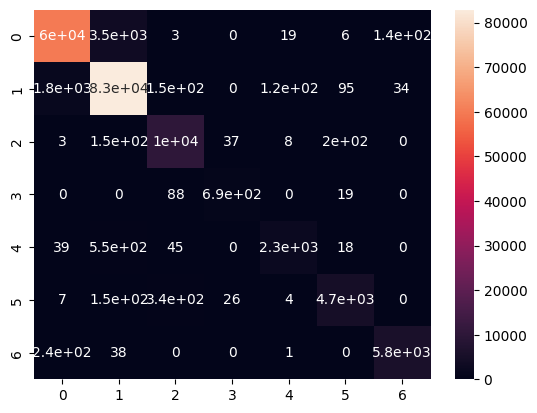

In [48]:
conf_gs = confusion_matrix(y_test, y_pred_gs)
sns.heatmap(conf_gs, annot=True)

A la `diagonal` de la matriu podem veure que tots els valors són més grans que a la resta de la matriu, indicant que aquest model prediu correctament la majoria de prediccions a totes les categories. On falla més és a la quarta categoria, que prediu molts del que són d'aquesta classificació com si fossin de la segona.

>Com hem vist, aquest model hiperparametritzat també ha superat els resultats del model base, resultant en el millor model de tots per al nostre conjunt de dades.

# 7. Discussió crítica dels resultats

Una vegada vist tots els models podem procedir a determinar quins han sigut els models més efectius i eficaços respecte aquestes dades del bosc Nacional de Roosevelt, ja que no vol dir que per a totes les dades siguin millors aquests.

Com és obvi, compararem les dades amb cadascun dels models que més exactitud han tengut, ja que consideram que és la mida de rendiment més important alhora de comparar models. Per tant, compararem estadístiques amb qualcun model base, qualcun amb hiperparàmetres, qualcun normalitzat i qualcun no, però sempre el millor model trobat per a cadascun:

- **Perceptró**: Model base  
- **Regressió logística**: Model hiperparametritzat amb GridSearchCV  
- **SVM**: svm hiperparametritzat amb GridSearchCV i usant la tècnica PCA per reduir la dimensionalitat
- **Decision Tree**: Model hiperparametritzat amb GridSearchCV
- **Random Forest**: Model hiperparametritzat amb GridSearchCV

## 7.1 Comparació d'Exactitud

>Primer, començarem comparant el terme d'exactitud (accuracy_score) de cadascun dels models. Per això, mostrarem una gràfica amb cada un dels models per a veure quins han sigut els millors models:

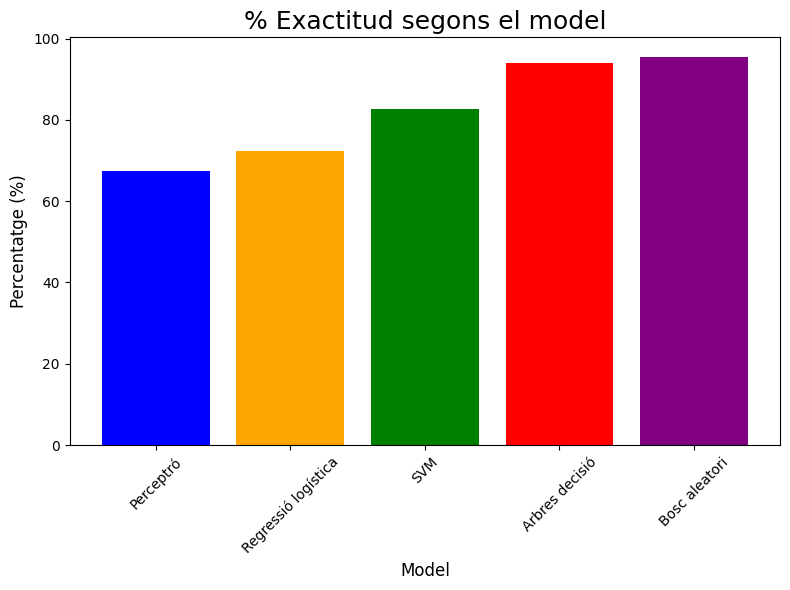

In [49]:
# Dades
models = ['Perceptró', 'Regressió logística', 'SVM', 'Arbres decisió', 'Bosc aleatori']
exactitud = [67.37, 72.34, 82.67, 94, 95.52]
colors = ['blue', 'orange', 'green', 'red', 'purple']
# Crear la figura i l'eix
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gràfic de barres
ax.bar(models, exactitud, color=colors)

# Configurar el títol i etiquetes
ax.set_title('% Exactitud segons el model', fontsize=18)
ax.set_ylabel('Percentatge (%)', fontsize=12)
ax.set_xlabel('Model', fontsize=12)

# Rotar les etiquetes dels models 
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gràfic
plt.tight_layout()  
plt.show()


Això mostra el percentatge d'accuracy, és a dir, l'exactitud, que es calcula com el nombre de prediccions correctes dividit pel nombre total de prediccions. Com es pot observar, els primers models, que són també els primers que varen sorgir, tenen una exactitud més baixa. Cal destacar que aquests models estaven més orientats a classificacions binàries, a diferència dels arbres de decisió i els boscos aleatoris, que suportaven les classificacions multiclasse des del principi.

A més, podem afirmar que algunes característiques del conjunt de dades estàn ben relacionades, fet que ha contribuït a l'alta eficàcia dels models d'arbres. També podem deduir que la distribució de les mostres presenta certa linealitat, tot i que no és molt forta, ja que tant el perceptró com la regressió logística mostren una exactitud relativament baixa, però no nul·la. 

>Tant els arbres de decisió com els boscs aleatoris no necessiten de dades normalitzades, ja que la partició de les dades a cada node és independent de la magnitud de les variables.

## 7.2 Comparació de Recall

>Ara mostrarem una gràfica que representa el recall per a cada categoria de tots els models.

Aquesta gràfica d'abaix representa el percentatge de recall que hi ha a cada una de les 7 categories que formen el tipus de coberta del Bosc Nacional. El recall representa la tasa de vertaders positius. Mesura la proporció de casos positius correctament identificats pel total de casos positius reals. Es calculen amb aquesta fórmula:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

On TP representa els vertaders positius i FN representa els falsos negatius.

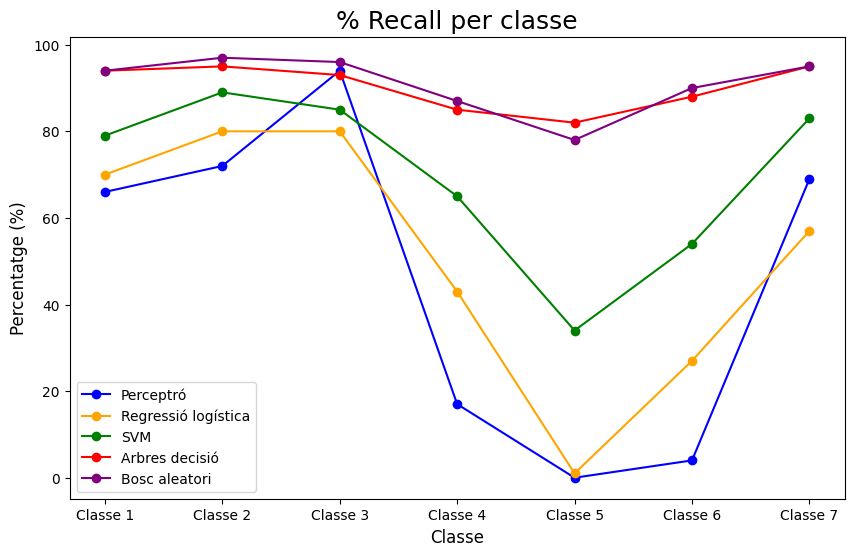

In [50]:
# Dades
perceptro = [66, 72, 94, 17, 0, 4, 69]
log_regr = [70, 80, 80, 43, 1, 27, 57]
svm = [79, 89, 85, 65, 34, 54, 83]
arbres_decisio = [94, 95, 93, 85, 82, 88, 95]
bosc_aleatori = [94, 97, 96, 87, 78, 90, 95]

# Crear la figura i l'eix
fig, ax = plt.subplots(figsize=(10, 6))

# Dibuixar les línies
ax.plot(perceptro, label='Perceptró', color='blue', marker='o')
ax.plot(log_regr, label='Regressió logística', color='orange', marker='o')
ax.plot(svm, label='SVM', color='green', marker='o')
ax.plot(arbres_decisio, label='Arbres decisió', color='red', marker='o')
ax.plot(bosc_aleatori, label='Bosc aleatori', color='purple', marker='o')

# Títol i etiquetes
ax.set_title('% Recall per classe', fontsize=18)
ax.set_ylabel('Percentatge (%)', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_xticks(range(len(perceptro)))
ax.set_xticklabels([f'Classe {i+1}' for i in range(len(perceptro))], fontsize=10)

# Afegir llegenda
ax.legend(fontsize=10)

# Mostrar el gràfic
plt.show()

A aquesta gràfica podem diferenciar 2 models respecte els altres, com són els arbres de decisió i els boscs aleatoris. Aquests dos tenen recalls similars molts alts a totes les categories i representen la regularitat d'aquests models ja que garanteixen una bona fiabilitat a cada una de les 7 categories del tipus de coberta forestal.

És diferent a la resta de models, on trobam que a partir de la la quarta classe, els valors positius són incorrectament classificats a les categories. Justament a aquestes classes és on menys dades (com hem vist al support de l'informe de classificació) hi ha, i pot haver un sobreajustament (overfitting) a causa d'aquesta falta de mostres, ja que pot memoritzar patrons específics d'aquella mostra, cosa que resulta en un recall més baix del normal.

## 7.3 Anàlisi de Reducció de Dimensionalitat de les Dades

>Ara comentarem els models que han requerit d'una reducció de les dimensions de les dades, ja que han tingut un temps d'execució superior al normal i han necessitat d'aquesta reducció per a controlar el temps.

| Model | Reducció dimensionalitat de les dades |
|-------|--------|
| Perceptró | No |
| Regressió logística | No |
| SVM | Sí |
| Arbres de decisió | No |
| Bosc aleatori | No |

Només el SVM, ha sigut l'únic que ha obtingut uns resultats molt bons amb PCA. Primer de tot, hem vist que aquest model necessitava d'una reducció de dimensions, ja que els models d'entrenament de SVM duraven molt i després, hem comprovat que amb la reducció de dades, el model obtenia uns resultats molt bons, millors que el model sense reducció.

Amb altres models, com el perceptró o la regressió logística, hem intentat la reducció de dimensionalitat de dades, però els resultats han estat molt allunyats al millor model obtingut de cadascun, i també que el temps d'entrenament no ha augmentat significativament sense aquesta reducció.

>En resum, és difícil la seva incorporació, ja que com és normal, quantes més dades tens, més possibilitats tens d'obtenir un millor model, però ens ha sorprès la seva exactitud al model SVM, obtenint resultats molt bons.

## 7.4 Anàlisi d'Hiperparàmetres eficaços

>Ara falta analitzar l'eficàcia dels hiperparàmetres, que és una tècnica que ajuda a obtenir millors models.

| Model | Hiperparàmetres eficaços |
|-------|---------|
| Perceptró | No |
| Regressió logística | Sí |
| SVM | Sí |
| Arbres de decisió | Sí |
| Bosc aleatori | Sí |

El perceptró és un model al qual hem intentat treure uns millors hiperparàmetres, ja que trobavem que el percentatge d'exactitud no era gaire bo. En canvi, la cerca d'hiperparàmetres no ha resultat productiva, ja que no hem tret millors resultats que el model base, que venia per defecte.

La regressió logística sí que ha donat resultat la cerca d'hiperparàmetres, ja que ha resultat en un millor rendiment, però no hi ha gaire diferència.

El SVM ha necessitat de la cerca d'hiperparàmetres, que ha resultat en una exactitud notable. Hem de tenir en compte que el SVM està calculat amb reducció de dimensionalitat.

Per acabar, els arbres de decisió i els boscs aleatoris han donat bons resultats d'inici i en un temps molt curt amb els models base, però encara així hem volgut millorar-los per a veure si era possible. Efectivament, ha donat un millor resultat amb hiperparàmetres i els resultats han estat d'una gran qualitat.

>En conclusió, la cerca d'hiperparàmetres és una bona tècnica per optimitzar els nostres models i obtenir unes millors prediccions. Com hem vist, a 4 dels 5 models hem trobat millors resultats amb hiperparàmetres. Això sí, requereix de temps i recursos.